# Set Theory Concepts

## Definition of a Partition

A collection of sets \\(\{A_1, \ldots, A_n\}\\) is a **partition** of the universal set \\(\Omega\\) if it satisfies the following conditions:

- **Non-overlap**: \\(\{A_1, \ldots, A_n\}\\) is disjoint.
- **Decompose**: \\(A_1 \cup A_2 \cup \ldots \cup A_n = \Omega\\).

---

## Important Laws

### Distributive (How to mix union and intersection)
$$
A \cap (B \cup C) = (A \cap B) \cup (A \cap C)
$$

$$
A \cup (B \cap C) = (A \cup B) \cap (A \cup C)
$$

---

### De Morgan’s Law (How to complement over intersection and union)

$$
(A \cap B)^c = A^c \cup B^c
$$

$$
(A \cup B)^c = A^c \cap B^c
$$


# Questions

## Question 1: Function to Check Partition
Write a Python function to check if a given list of sets is a partition of a universal set. The function should take the universal set and the list of sets as arguments and verify the following conditions:
1. The union of all subsets in the list equals the universal set.
2. The subsets are pairwise disjoint.

Write your function and test it with an example.

In [30]:
def is_partition(universal_set, subsets):
    
    union_of_subsets = set().union(*subsets)
    if union_of_subsets != universal_set:
        return "Union of Subset is not equal to Universal Set"
    
    for i, subset1 in enumerate(subsets):
        for j, subset2 in enumerate(subsets):
            if i != j and subset1.intersection(subset2):
                return "Subset are not disjoints"
    
    return "Union  of Subset is not equal to Universal Set and Subset are disjoints."

universal = {1, 2, 3, 4, 5}

subsets = [{1, 2}, {3}, {4, 5}]
print(is_partition(universal, subsets))

subsets_invalid_disjoint = [{1, 2}, {2, 3}, {4, 5}]
print(is_partition(universal, subsets_invalid_disjoint))

subsets_invalid_missing = [{1, 2}, {3}]
print(is_partition(universal, subsets_invalid_missing))

Union  of Subset is not equal to Universal Set and Subset are disjoints.
Subset are not disjoints
Union of Subset is not equal to Universal Set


## Question 2: Laws
With an example numpy array corresponding to set A, B, C, show the distributive properties and De Morgan's Laws. Also, use `venn3` from `matplotlib_venn` library for vizualization.



Distributive Law

         A ∩ (B ∪ C): {0, 2, 3, 4, 5} = (A ∩ B) ∪ (A ∩ C): {0, 2, 3, 4, 5}
A ∪ (B ∩ C): {0, 1, 2, 3, 4, 5, 6, 8} = (A ∪ B) ∩ (A ∪ C): {0, 1, 2, 3, 4, 5, 6, 8}

De Morgan's Law

      ¬(A ∪ B): {1, 4, 5, 6, 7, 8, 9} = ¬A ∩ ¬B: {1, 4, 5, 6, 7, 8, 9}
                        ¬(A ∩ B): {9} = ¬A ∪ ¬B: {9}




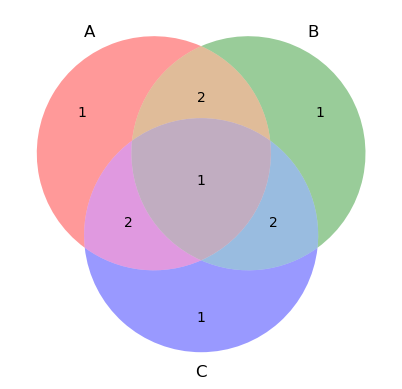

In [32]:
from matplotlib_venn import venn3, venn2, venn3_circles
import numpy as np
import matplotlib.pyplot as plt

universal_array = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

A = np.array([1, 2, 3, 4, 5, 0])
B = np.array([2, 3, 6, 7, 8, 0])
C = np.array([4, 5, 6, 8, 9, 0])

universal_set = set(universal_array)

Set_A = set(A)
Set_B = set(B)
Set_C = set(C)

not_A = universal_set - Set_A
not_B = universal_set - Set_B

Set_A_BC = set(Set_A.intersection(Set_B.union(Set_C)))
Set_AB_AC = set((Set_A.intersection(Set_B)).union(Set_A.intersection(Set_C)))

set_a_bc = Set_A.union(Set_B.intersection(Set_C))
set_ab_ac = (Set_A.union(Set_B).intersection(Set_A.union(Set_C)))

demorgan1_lhs = universal_set - (Set_A.intersection(Set_B))
demorgan1_rhs = not_A.union(not_B)

demorgan2_lhs = universal_set - (Set_A.union(Set_B))
demorgan2_rhs = not_A.intersection(not_B)

print('Distributive Law\n')
print(f"         A ∩ (B ∪ C): {Set_A_BC} = (A ∩ B) ∪ (A ∩ C): {Set_AB_AC}")
print(f"A ∪ (B ∩ C): {set_a_bc} = (A ∪ B) ∩ (A ∪ C): {set_ab_ac}\n")

print("De Morgan's Law\n")
print(f'      ¬(A ∪ B): {demorgan1_lhs} = ¬A ∩ ¬B: {demorgan1_rhs}')
print(f'                        ¬(A ∩ B): {demorgan2_lhs} = ¬A ∪ ¬B: {demorgan2_rhs}\n\n')

venn = venn3([Set_A, Set_B, Set_C], ('A', 'B', 'C'))
plt.show(venn)

## Question 3: Union and Intersection of Students
For below code:
1. The union of all sets of students present across the three subjects.
2. The intersection of all sets of students present across the three subjects.

```python
import pandas as pd
# Dictionary of marks
marks = {
    "Math": {"Alice": 85, "Bob": 90, "Charlie": 78},
    "Physics": {"Bob": 88, "Charlie": 92, "David": 75},
    "Chemistry": {"Alice": 82, "Charlie": 80, "Eve": 91},
}


# Convert the dictionary to a DataFrame
df = pd.DataFrame(marks).T
```

In [34]:
import pandas as pd

# Dictionary of marks
marks = {
    "Math": {"Alice": 85, "Bob": 90, "Charlie": 78},
    "Physics": {"Bob": 88, "Charlie": 92, "David": 75},
    "Chemistry": {"Alice": 82, "Charlie": 80, "Eve": 91},
}

df = pd.DataFrame(marks).T

union_students = set(df.columns)
intersection_students = set(df.dropna(axis=1).columns)

print("Union of students across all subjects:", union_students)
print("Intersection of students across all subjects:", intersection_students)

Union of students across all subjects: {'David', 'Alice', 'Eve', 'Charlie', 'Bob'}
Intersection of students across all subjects: {'Charlie'}


# Question 4
Implement a Python function to compute the cartesian product of two sets A and B without using Python's built-in functions or libraries like itertools. The function should return the cartesian product as a set of ordered pairs (tuples).


In [36]:
def cartesian_product(A, B):
  
    result = set()
    for a in A:
        for b in B:
            result.add((a, b))
    return result

A = {1, 2, 3}
B = {'x', 'y'}

cartesian_result = cartesian_product(A, B)

print("Cartesian Product:", cartesian_result)

Cartesian Product: {(2, 'x'), (3, 'x'), (1, 'x'), (2, 'y'), (3, 'y'), (1, 'y')}
